In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from modcma.c_maes import ModularCMAES, parameters, options, constants, utils, es

import matplotlib

from matplotlib.patches import Ellipse, Rectangle
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 15})


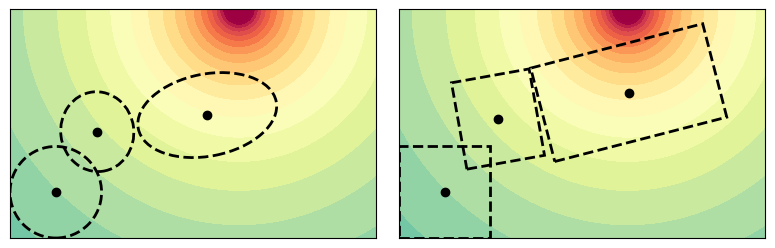

In [159]:
d = 2 

def sphere(x):
    x = np.asarray(x)
    return x.dot(x)

def get_meshgrid(objective_function, lb, ub, delta: float = 0.025):
    x = np.arange(lb, ub + delta, delta)
    y = np.arange(lb, ub + delta, delta)

    if hasattr(objective_function, "optimum"):
        xo, yo = objective_function.optimum.x
        x = np.sort(np.r_[x, xo])
        y = np.sort(np.r_[y, yo])

    X, Y = np.meshgrid(x, y)

    Z = np.zeros(X.shape)
    for idx1 in range(X.shape[0]):
        for idx2 in range(X.shape[1]):
            Z[idx1, idx2] = objective_function([X[idx1, idx2], Y[idx1, idx2]])
    return X, Y, Z


X, Y, Z = get_meshgrid(sphere, -5, 3)

x0 = np.array([-4, -4])


modules = parameters.Modules()
modules.sample_transformation = options.SampleTranformerType(1)
settings = parameters.Settings(dim=2, modules=modules, x0=x0, sigma0=2)

utils.set_seed(10)
cma = ModularCMAES(settings)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharex=True, sharey=True)

ax1.contourf(
    X, Y, np.log10(Z), levels=200, cmap="Spectral", zorder=-1, vmin=-1, vmax=2.5
)
ax2.contourf(
    X, Y, np.log10(Z), levels=200, cmap="Spectral", zorder=-1, vmin=-1, vmax=2.5
)

for i in range(3):
    m = cma.p.adaptation.m.copy()
    C = cma.p.adaptation.C.copy()
    sigma = cma.p.mutation.sigma
    theta = np.degrees(np.arctan2(C[1, 0], C[0, 0]))
    
    color = 'black'
    p = ax1.scatter(*m, label=i, color=color)
    
    current = Ellipse(
        m,
        *(sigma * np.diag(C)),
        angle=theta,
        facecolor="none",
        edgecolor=p.get_edgecolor(),
        linewidth=2,
        linestyle="dashed",
        zorder=0,
    )
    ax1.add_patch(current)
    cma.step(sphere)
    
    
    
modules = parameters.Modules()
modules.sample_transformation = options.SampleTranformerType(2)
settings = parameters.Settings(dim=2, modules=modules, x0=x0, sigma0=2)

utils.set_seed(10)
cma = ModularCMAES(settings)

for i in range(3):
    m = cma.p.adaptation.m.copy()
    C = cma.p.adaptation.C.copy()
    sigma = cma.p.mutation.sigma
    theta = np.degrees(np.arctan2(C[1, 0], C[0, 0]))
    
    color = 'black'
    p = ax2.scatter(*m, label=i, color=color)
    
    
    width = sigma * C[0, 0]
    height = sigma * C[1, 1]
    
    current = Rectangle(
       (-width / 2, -height / 2), width, height,
        facecolor="none",
        edgecolor=p.get_edgecolor(), 
        linewidth=2,
        linestyle="dashed",
        zorder=0,   
    )
    transformation = (
        Affine2D()
        .rotate_deg(theta)  
        .translate(*m)
        + ax2.transData  
    )
    
    current.set_transform(transformation)
    
    ax2.add_patch(current)
    cma.step(sphere)
    

for ax in ax1, ax2:
    ax.set_aspect("equal")
    ax.set_ylim(-5, 0)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.savefig("figures/adaptation.pdf")


(-1.0, 7.0)

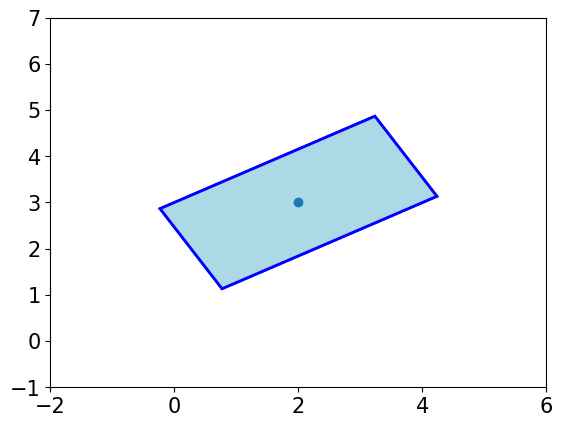

In [132]:
fig, ax = plt.subplots()
from matplotlib.transforms import Affine2D

center_x, center_y = 2.0, 3.0
width, height = 4.0, 2.0
angle = 30.0  # Rotation angle in degrees
rectangle = Rectangle((-width / 2, -height / 2), width, height, edgecolor='blue', facecolor='lightblue', lw=2)

# Apply the rotation and translation using a transformation
transformation = (
    Affine2D()
    .rotate_deg(angle)  # Rotate the rectangle by the given angle
    .translate(center_x, center_y)  # Move the rectangle to the center point
    + ax.transData  # Apply to the axis
)

rectangle.set_transform(transformation)
ax.add_patch(rectangle)

# Add the rectangle to the plot
ax.add_patch(rectangle)
ax.scatter(center_x, center_y)

padding = max(width, height)
ax.set_xlim(center_x - padding, center_x + padding)
ax.set_ylim(center_y - padding, center_y + padding)